# Clustering cancer cells(Hierarchical Clustering)
### An alternative way to cluster our data is by taking a bottom-up approach.
### We start by making a cluster for each sample of our data.
### Then we combine (merge) the clusters making larger clusters.
### In this way we create a cluster hierarchy. The approach is called *hierarchical clustering* (hierarchical clustering) or *additive clustering* (agglomerative clustering).

* Clusters are combined pairwise, each time finding a pair of clusters that are shorter than each other according to some metric.

* An advantage of hierarchical clustering is that we do not have to decide from scratch on the number of clusters.

* To see hierarchical clustering in action, we will use the NCI60 gene data.

* These contain measurements from 6,830 genes in 64 cancer cell cultures.

* Each culture has the name of the type of cancer it concerns, in the `labs` column.

* Data are available through the R program.

In [1]:
import statsmodels.api as sm

nci = sm.datasets.get_rdataset(dataname='NCI60', package='ISLR')
nci_df = nci.data
nci_df

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,MELANOMA
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,MELANOMA
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,MELANOMA
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,MELANOMA


* To see how many cultures correspond to each type of cancer.

In [2]:
labs_vc = nci_df['labs'].value_counts()
print(labs_vc.shape[0])
labs_vc

14


RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: labs, dtype: int64

* We'll use `StandardScaler()`. 

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_df.iloc[:, :-1])
nci_scaled.shape

(64, 6830)

* To get a first idea of ​​whether the clustering makes sense, we'll view them in fewer dimensions, so we can at least visually see if clusters appear.

* For this purpose we will use PCA.

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(nci_scaled)
print(X.shape)
pca.explained_variance_ratio_

(64, 64)


array([1.13589419e-01, 6.75620253e-02, 5.75184223e-02, 4.24755448e-02,
       3.73497235e-02, 3.61863019e-02, 3.06622240e-02, 2.68590309e-02,
       2.52949807e-02, 2.37586884e-02, 2.35655815e-02, 2.16412198e-02,
       2.04909747e-02, 1.97881793e-02, 1.91541737e-02, 1.77176082e-02,
       1.66272971e-02, 1.61075898e-02, 1.59433320e-02, 1.55991861e-02,
       1.50721674e-02, 1.48009892e-02, 1.43576234e-02, 1.36277104e-02,
       1.32350200e-02, 1.27519917e-02, 1.25903703e-02, 1.20979413e-02,
       1.18098781e-02, 1.12098170e-02, 1.08277440e-02, 1.04477523e-02,
       1.02647051e-02, 9.88274535e-03, 9.74257138e-03, 9.31114503e-03,
       9.14795316e-03, 8.95640894e-03, 8.72950586e-03, 8.42575751e-03,
       8.13979814e-03, 7.89749805e-03, 7.39000998e-03, 7.20101586e-03,
       7.08918353e-03, 6.90272334e-03, 6.78495251e-03, 6.47012955e-03,
       6.40883777e-03, 6.01193511e-03, 5.66418607e-03, 5.63402788e-03,
       5.38935217e-03, 5.12786334e-03, 5.11796180e-03, 4.81620125e-03,
      

* If we use the first three components, we can see that clusters do indeed appear to occur.

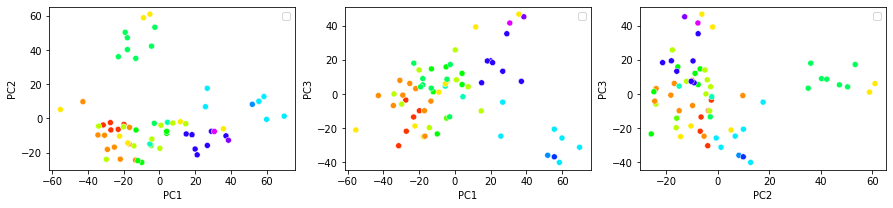

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend('')
plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend('')
plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=nci_df['labs'], 
                palette=sns.color_palette('gist_rainbow', n_colors=labs_vc.shape[0]))
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend('')

* Since we are in PCA, let's look at the charts with the percentages of variation.

* We see an inflection around the seventh principal component, where we reach 40% of the variance cumulatively.

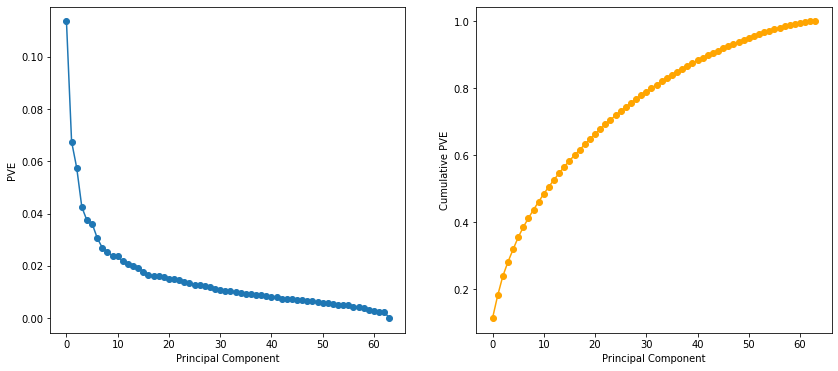

In [6]:
import numpy as np

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

* For hierarchical clustering we will use SciPy.

* We need to define the metric by which we measure the difference (distance) between two clusters so that we can find the ones with the smallest distance between them.

* This difference is called *linkage*.

* In *complete* connectivity, for two clusters $A$ and $B$ we store all pairwise distances between samples in $A$ and $B$ and use the *maximum* distance as the difference between $ A$ and $B$:

$$\max \,\{\,d(a,b):a\in A,\,b\in B\,\}$$

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_model_complete = linkage(nci_scaled, 'complete')

* After calculating the connectivity, we can construct a *dendrogram* that shows us the hierarchical structure of the clusters.

* In the dendrogram, the length of each branch corresponds to the distance between the two clusters that are joined.

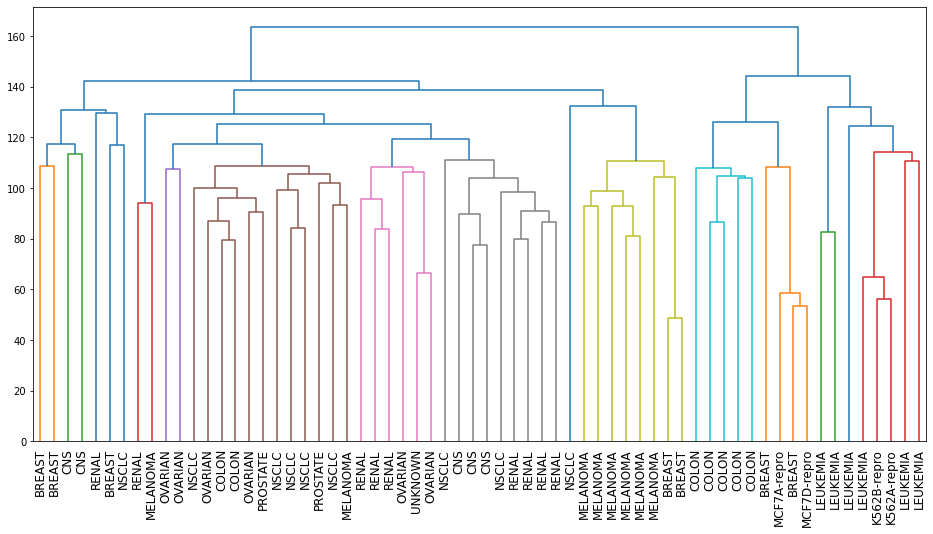

In [8]:
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_complete, orientation='top', labels=nci_df['labs'], leaf_font_size=12)

* Another connection method is the *average* connection.

* We calculate all distances between all pairs of samples from cluster $A$ and $B$ and use the *average* of the distances:

$$ {\frac {1}{|A|\cdot |B|}}\sum _{a\in A}\sum _{b\in B}d(a,b)$$

* To be more precise, the method is called *unweighted average linkage*, or UPGMA.

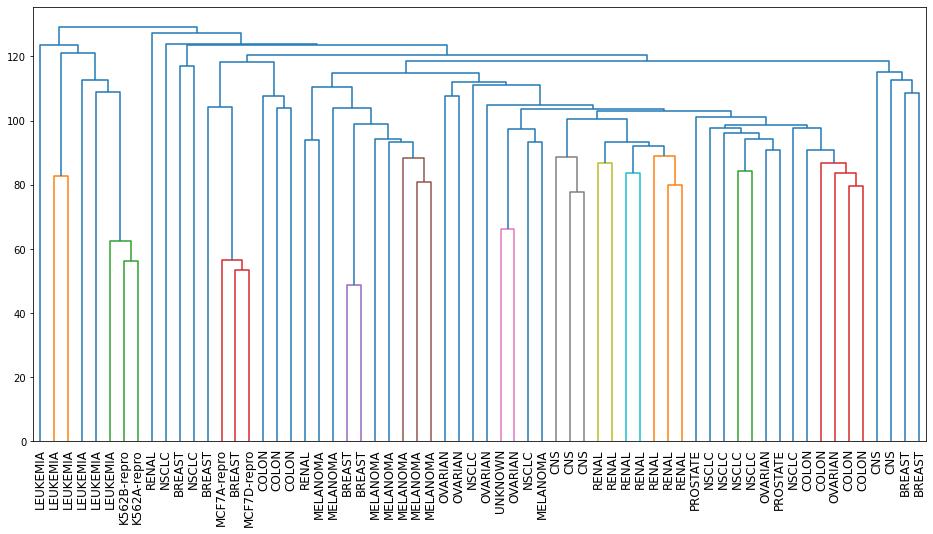

In [9]:
cluster_model_average = linkage(nci_scaled, method="average")
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_average, orientation='top', labels=nci_df['labs'], leaf_font_size=12)

* Another connection method is the *single* interface.

* We calculate all distances between all pairs of samples from cluster $A$ and $B$ and use the smallest distance:

$$\min \,\{\,d(a,b):a\in A,\,b\in B\,\}$$

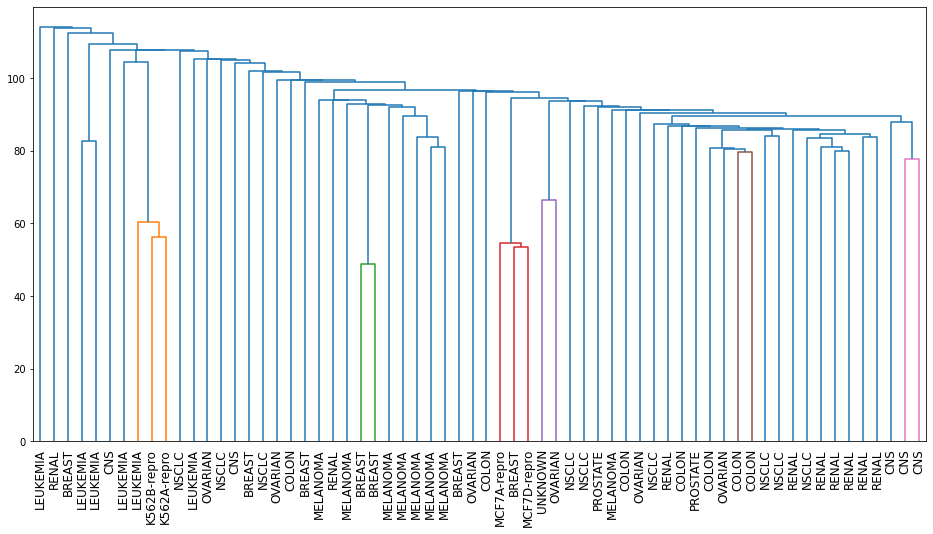

In [10]:
cluster_model_average = linkage(nci_scaled, method="single")
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_average, orientation='top', labels=nci_df['labs'], leaf_font_size=12)

* Suppose we will use full connection and keep four clusters.

* We can find the cluster of each observation using the `fcluster()` function.

In [11]:
from scipy.cluster.hierarchy import fcluster

hc_labels = fcluster(cluster_model_complete, 4, criterion='maxclust')
hc_labels

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

* We will put the cluster of each observation, along with the cancer type, into a `DataFrame`.

In [12]:
import pandas as pd

labs_cluster_df = pd.DataFrame({'labs': nci_df['labs'], 'cluster': hc_labels})
labs_cluster_df

,labs,cluster
V1,CNS,2
V2,CNS,2
V3,CNS,2
V4,RENAL,2
V5,BREAST,1
...,...,...
V60,MELANOMA,2
V61,MELANOMA,2
V62,MELANOMA,2
V63,MELANOMA,2


* Then, using `pivot_table()` we can see which types of cancer are included in each cluster.

* For example, all cases of leukemia are in cluster 4.

* Breast cancer cases are included in clusters 1, 2, 3.

In [13]:
labs_cluster_df.pivot_table(index='cluster', columns='labs', aggfunc='size').fillna(0)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
cluster,,,,,,,,,,,,,,
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,6.0,2.0,8.0,1.0
3,2.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* If we want a graphical representation of the clusters, we can draw a horizontal line where the four clusters form.

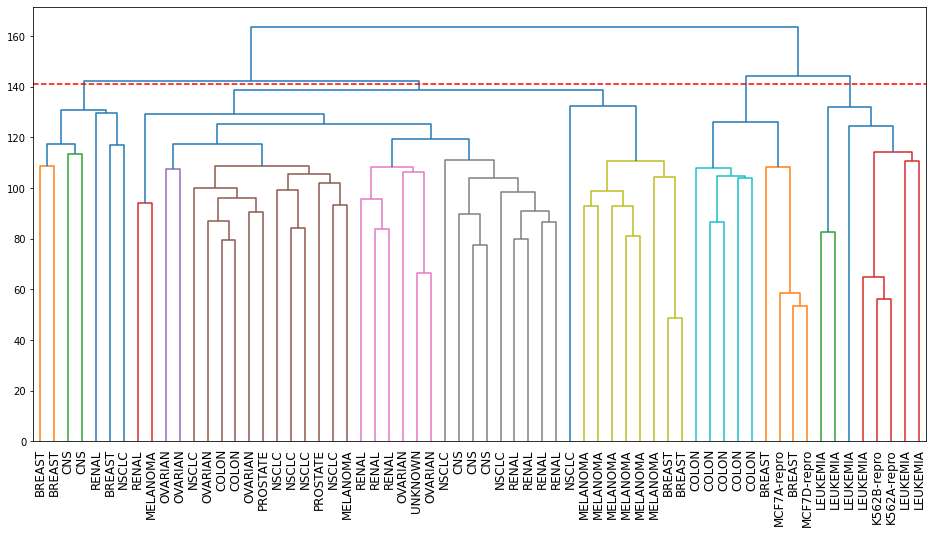

In [14]:
plt.figure(figsize=(16, 8))
_ = dendrogram(cluster_model_complete, orientation='top', labels=nci_df['labs'], leaf_font_size=12)
plt.axhline(y=141, color='r', linestyle='dashed')

* It is interesting to compare the results with what we would get if we used k-means.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init=20)
km_labels = kmeans.fit_predict(nci_scaled)
km_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

* Since cluster names here start at 0, we add 1 to them so they have the same namespace as hierarchical clustering.

* This does not mean that synonymous clusters are the same!

In [16]:
km_labels += 1
km_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

* To find exactly the correspondence of the clusters, we can make a *cross tabulation table*.

In [17]:
pd.crosstab(hc_labels, km_labels, rownames=['hc'], colnames=['kmeans'])

kmeans,1,2,3,4
hc,,,,
1,7,0,0,0
2,28,3,9,0
3,0,9,0,0
4,0,0,0,8


* All cluster 1 members from hierarchical clustering belong to k-means cluster 1.

* All members of cluster 3 from hierarchical clustering belong to cluster 2 of k-means.

* All cluster 4 members from hierarchical clustering belong to k-means cluster 4.